In [22]:
#패키지
import SimpleITK as sitk
import pydicom as dcm
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import os
import pandas as pd


In [23]:
PATH_DATASET_CSV = '../Dataset/Dataset_with_path.csv'

df_dataset = pd.read_csv(PATH_DATASET_CSV)

In [26]:
df_dataset = df_dataset[['source','path','filename','group_maxinc','age']].dropna()
df_dataset = df_dataset.reset_index(drop=True)


In [27]:
df_dataset

,source,path,filename,group_maxinc,age
0,OASIS-3,../Dataset/OASIS_BET\sub-OAS30011_sess-d0055_T...,sub-OAS30011_sess-d0055_T1w.nii,CN,78
1,OASIS-3,../Dataset/OASIS_BET\sub-OAS30013_sess-d0102_T...,sub-OAS30013_sess-d0102_T1w.nii,MCI,71
2,OASIS-3,../Dataset/OASIS_BET\sub-OAS30014_sess-d0196_r...,sub-OAS30014_sess-d0196_run-01_T1w.nii,CN,70
3,OASIS-3,../Dataset/OASIS_BET\sub-OAS30014_sess-d0196_r...,sub-OAS30014_sess-d0196_run-02_T1w.nii,CN,70
4,OASIS-3,../Dataset/OASIS_BET\sub-OAS30015_sess-d0116_r...,sub-OAS30015_sess-d0116_run-01_T1w.nii,CN,65
5,OASIS-3,../Dataset/OASIS_BET\sub-OAS30015_sess-d0116_r...,sub-OAS30015_sess-d0116_run-02_T1w.nii,CN,65
6,OASIS-3,../Dataset/OASIS_BET\sub-OAS30016_sess-d0021_T...,sub-OAS30016_sess-d0021_T1w.nii,MCI,77
7,ADNI,../Dataset/ADNI_BET\I30829.nii,I30829.nii,CN,87
8,ADNI,../Dataset/ADNI_BET\I36695.nii,I36695.nii,MCI,56
9,ADNI,../Dataset/ADNI_BET\I45096.nii,I45096.nii,MCI,85


In [28]:
def read_dicom_file(source,filepath):
    """Read and load volume"""
    sitk_t1 = sitk.ReadImage(filepath)
    print('ORG_Direction',sitk_t1.GetDirection())
    #print('ORG_Origin',sitk_t1.GetOrigin())
    sitk_t1.SetDirection([1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0])
    #print('TOBE_Origin',sitk_t1.GetOrigin())
    print('TOBE_Direction',sitk_t1.GetDirection())

    image = sitk.GetArrayFromImage(sitk_t1)
    #oasis
    if source=='OASIS-3':
        image = image.transpose(1,2,0)
        image = ndimage.rotate(image,180,reshape=False)
        image = image[:,:,::-1]
    else:
        image = image.transpose(2,0,1)
    return image


def sample_stack(stack,rows=6,cols=6,start_with=10,show_every=5,subtitle='title'):
    fig,ax = plt.subplots(rows,cols,figsize=[12,12])
    plt.suptitle(subtitle)
    for i in range(rows*cols):
        ind = start_with = i*show_every
        ax[int(i / rows),int(i % rows)].set_title('slice %d'%ind)
        ax[int(i / rows),int(i % rows)].imshow(stack[:,:,ind],cmap='gray')
        ax[int(i / rows),int(i % rows)].axis('off')
    plt.show()

def preprocessing(image):
    return image

def process_scan(source, filepath):
    
    image = read_dicom_file(source, filepath)
    
    image = preprocessing(image)

    return image


ORG_Direction (-0.9984413058009047, -0.024875963711672652, -0.04996143987889132, 0.029716086267725435, -0.994683647502122, -0.09859713835777745, -0.04724312741038013, -0.09992811326793816, 0.993872456018822)
TOBE_Direction (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
(256, 176, 256)


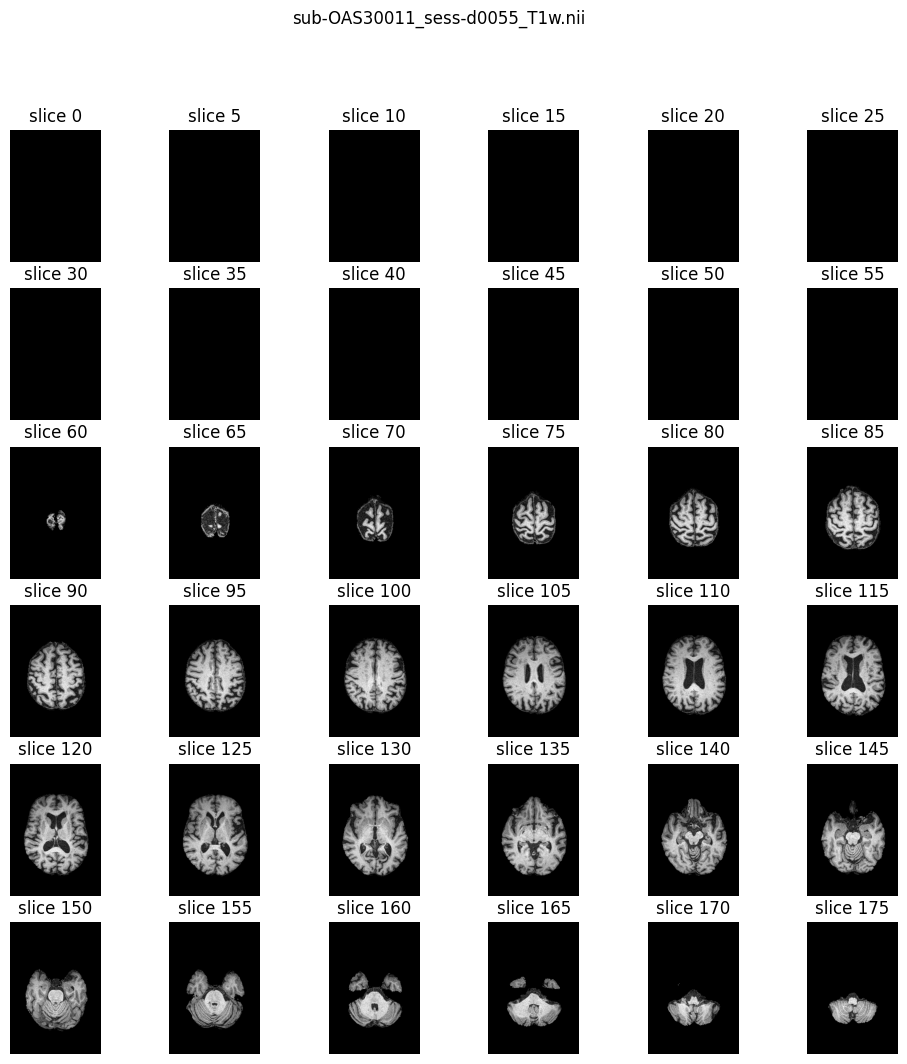

In [29]:
img_num=0
filename=df_dataset['filename'][img_num]
img = read_dicom_file(df_dataset['source'][img_num],df_dataset['path'][img_num])
print(img.shape)
sample_stack(img,subtitle=filename)


ORG_Direction (-2.5249553559092403e-08, -0.0401317928871531, -0.9991943951251007, 0.9999999999999993, -2.5249553849165426e-08, -2.4255782846929585e-08, -2.4255784936144648e-08, -0.9991943951002038, 0.040131792267271336)
TOBE_Direction (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
(240, 160, 256)


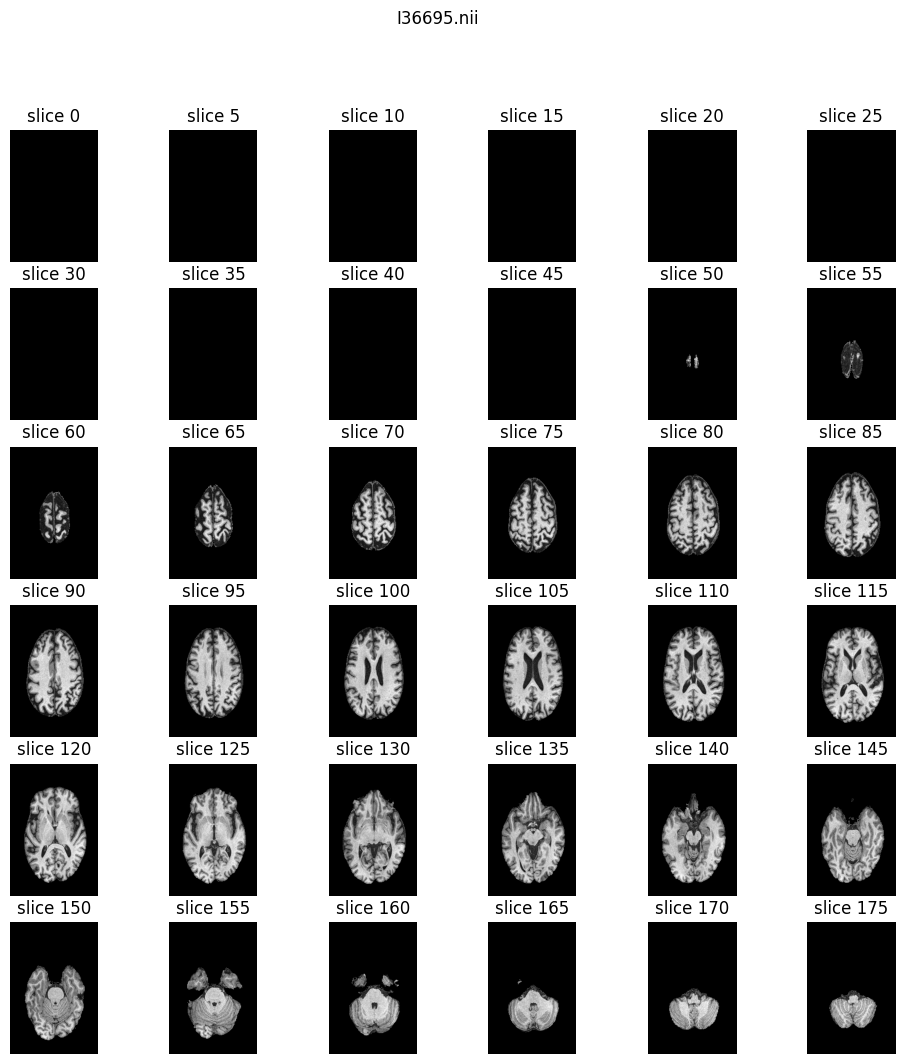

In [30]:
img_num=8
filename=df_dataset['filename'][img_num]
img = read_dicom_file(df_dataset['source'][img_num],df_dataset['path'][img_num])
print(img.shape)
sample_stack(img,subtitle=filename)
